In [2]:
import numpy as np
import matplotlib as matlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy.sparse import spdiags
from scipy.sparse import kron
from mpl_toolkits.mplot3d import Axes3D
import time
import random
from sklearn.decomposition import PCA, NMF
import scipy.sparse as sp
import scipy.linalg as linalg
from numpy.random import default_rng
import matplotlib.patches as mpatches
import ot
import Gradient;

In [3]:
##discretize the area: w: [0, 1] mu11: [-2, 4]
##center at [1, 0.5]
##N is the number of grids in each directions
wrange = np.array([0, 1]);
murange = np.array([-2, 5]);
# N = 45;
# dx = (murange[1]-murange[0])/N; dy = (wrange[1]-wrange[0])/N;
# X = [];
# for i in range(1, N):
#     for j in range(1, N):
#         X.append([1-(murange[1]-murange[0])/2 + dx*i, 0.5-(wrange[1]-wrange[0])/2 + dy*j]);
# X = np.array(X);

##X must have center at [2.25, 2.25]
N = 85; S = 15;
dx = S/N; dy = S/N;
X = [];
for i in range(1, N):
    for j in range(1, N):
        X.append([2-S/2 + dx*i, 2-S/2 + dy*j]);
X = np.array(X);
k = 2;
w_true = np.array([0.3]);
mu_true = np.array([[1, 3], [3, 2]]);
ytruth = Gradient.model(X, k, mu_true, w_true);
initial = np.array([0.8, 4, 4, 4, 3]);
A = Gradient.discretize(N,dx, dy);

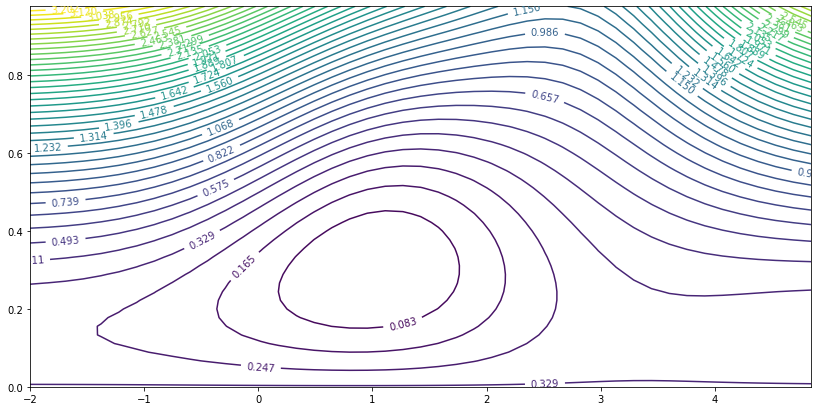

In [4]:
Gradient.plot_wmu11(X, np.array([3, 2]), 3, ytruth, murange, wrange, 45)
## rho* = 0.3 N([1, 3]) + 0.7N([3, 2])
## rho' = 0.3 N([1, 3]) + 0.7N([3, 2])

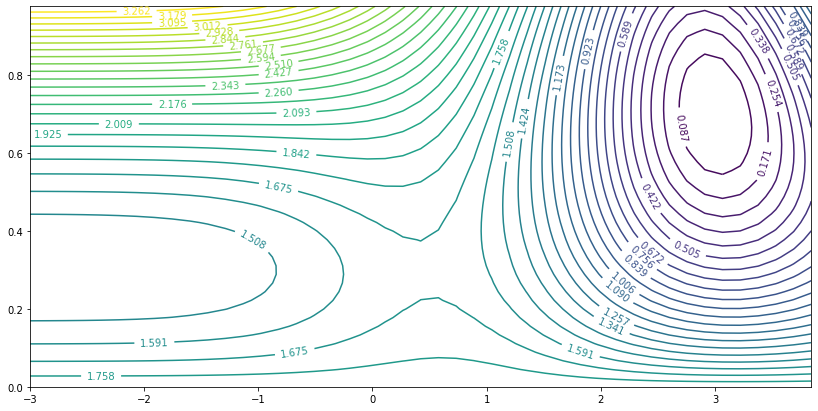

In [5]:
Gradient.plot_wmu11(X, np.array([1, 3]), 2, ytruth, murange, wrange, 45)
## rho* = 0.3 N([1, 3]) + 0.7N([3, 2])
## rho' = 0.7 N([3, 2]) + 0.3N([1, 3])
## rho'' = 0.3N([-3, 2]) + 0.7N([1, 3])

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


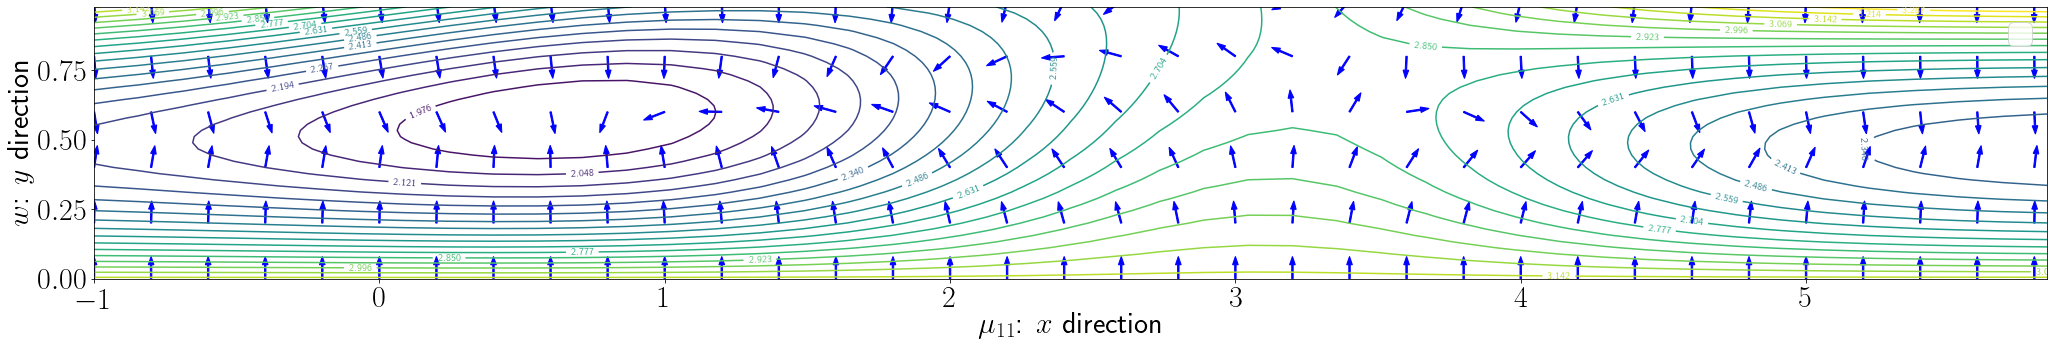

In [4]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/stdwmu11-f34d5-4-N85-S15-C22.eps"
Gradient.VF_stdwmu11(X, np.array([3, 4.5]), 4, ytruth, savpath=sav, xrange=[-1, 6]);

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


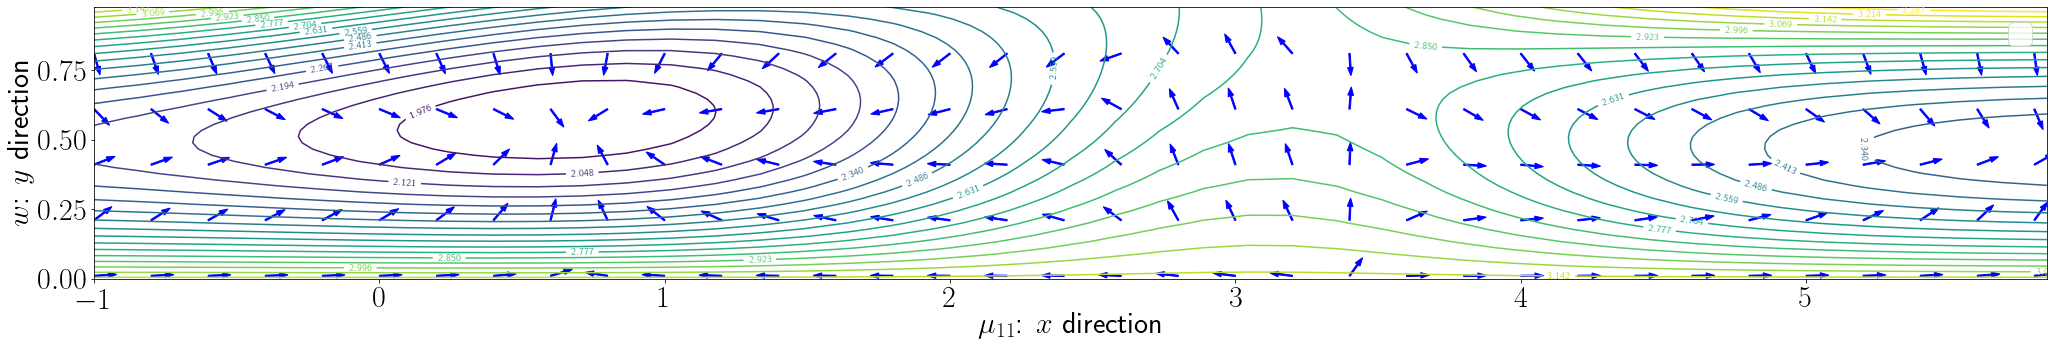

In [4]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/l2wmu11-f34d5-4-N85-S15-C22.eps"
Gradient.VF_l2wmu11(X, np.array([3, 4.5]), 4, ytruth, savpath=sav, xrange=[-1, 6]);

In [8]:
# for mu21 in np.arange(-1, 5.1, .5):
#     for mu22 in np.arange(-1.5, 5.6, .5):
#         mu2 = np.array([mu21, mu22]);
#         print(mu2);
#         for mu12 in np.arange(-2, 6.1, 1):
#             path1 = "/Users/leiwanzhou/Desktop/vectorfields/set3/plots/std/N85-S15-C22-mu2{}{}-mu12{}.png".format(str(mu21).replace('.', 'd'), 
#                             str(mu22).replace('.', 'd'), str(mu12).replace('.', 'd'));
#             path2 = "/Users/leiwanzhou/Desktop/vectorfields/set3/plots/l2/N85-S15-C22-mu2{}{}-mu12{}.png".format(str(mu21).replace('.', 'd'), 
#                             str(mu22).replace('.', 'd'), str(mu12).replace('.', 'd'));
#             Gradient.VF_stdwmu11(X, mu2, mu12, ytruth, savpath=path1, xrange=[-2, 5]);
#             Gradient.VF_l2wmu11(X, mu2, mu12, ytruth, savpath=path2, xrange=[-2, 5]);

In [4]:
B = Gradient.Bmatrix(X, N, np.array([.4]), np.array([[1, 4], [3, 2]]), 2, A);
B = B.toarray();

In [5]:
q, r= linalg.qr(B.T, mode = 'economic');
dudtheta, drhodtheta = Gradient.gradient_w_mu11(X, .4, np.array([[1, 4], [3, 2]]), ytruth);

In [6]:
Z = np.linalg.solve(r.T, -drhodtheta);
Y = np.matmul(q, Z);

In [9]:
Gradient.w2_dir_wmu11(X, .4, np.array([[1, 4], [3, 2]]), ytruth, A, N)

array([-0.00904293, -0.00377496])

-2.0
-1.8
-1.6
-1.4000000000000001
-1.2000000000000002
-1.0000000000000002
-0.8000000000000003
-0.6000000000000003
-0.40000000000000036
-0.2000000000000004
-4.440892098500626e-16
0.1999999999999993
0.39999999999999947
0.5999999999999996
0.7999999999999994
0.9999999999999991
1.1999999999999993
1.3999999999999995
1.5999999999999992
1.799999999999999
1.9999999999999991
2.1999999999999993
2.3999999999999986
2.5999999999999988
2.799999999999999
2.999999999999999
3.1999999999999993
3.3999999999999986
3.5999999999999988
3.799999999999999
3.9999999999999982
4.199999999999998
4.399999999999999
4.599999999999999
4.799999999999999


No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


6925.592311143875


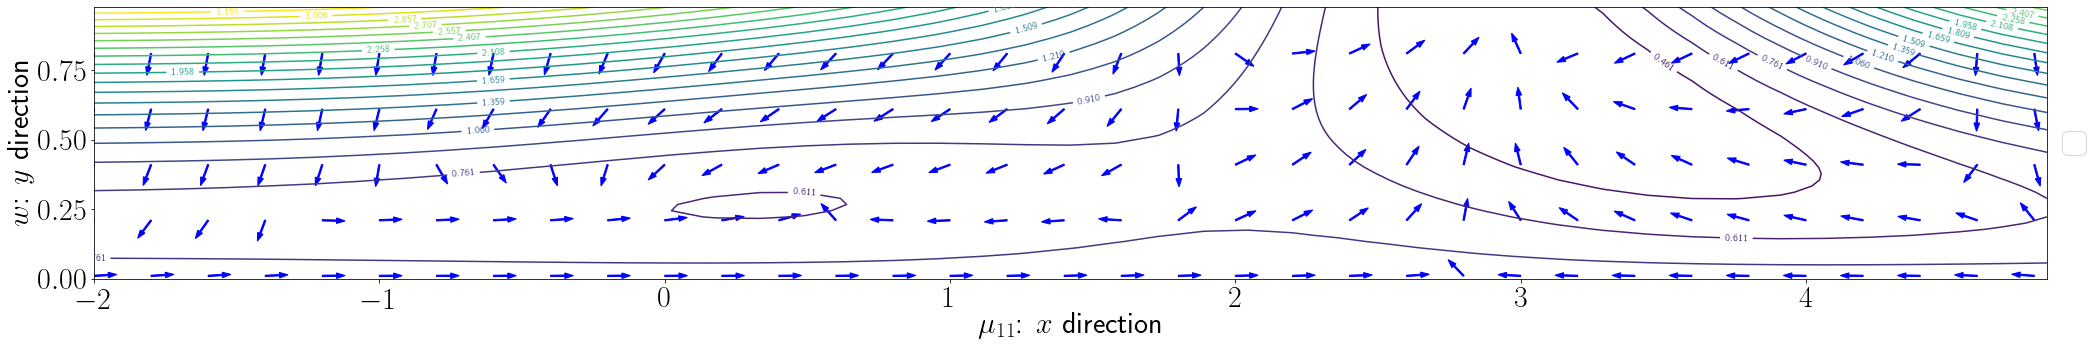

In [5]:
sav1 = "/Users/leiwanzhou/Desktop/vectorfields/set3/w2wmu11-f2d51d5-2-N85-S15-C22.eps"
sav2 = "/Users/leiwanzhou/Desktop/vectorfields/set3/w2VFlog/w2wmu11-f2d51d5-2-N85-S15-C22.csv"
s=time.time();
Gradient.VF_w2wmu11(X, N, A, np.array([2.5, 1.5]), 2, ytruth, savpath=sav1, savpath2=sav2,
                    xrange = [-2, 5]);
e=time.time();
print(e-s)

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


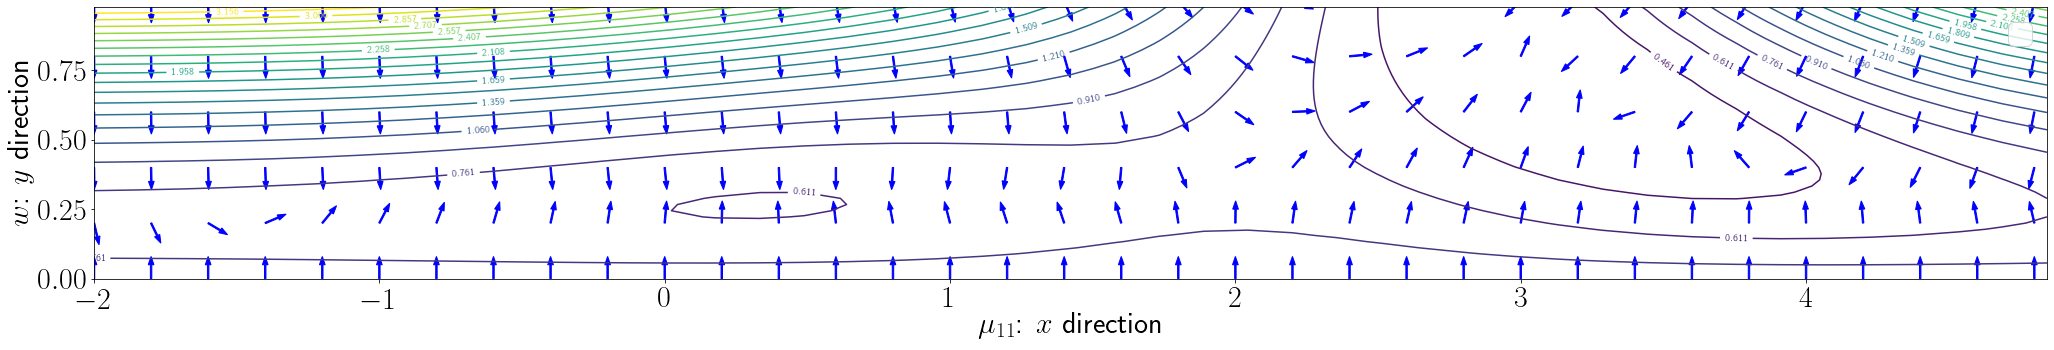

In [5]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/stdwmu11-f2d51d5-2-N85-S15-C22.eps"
Gradient.VF_stdwmu11(X, np.array([2.5, 1.5]), 2, ytruth, savpath=sav, xrange=[-2, 5]);

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


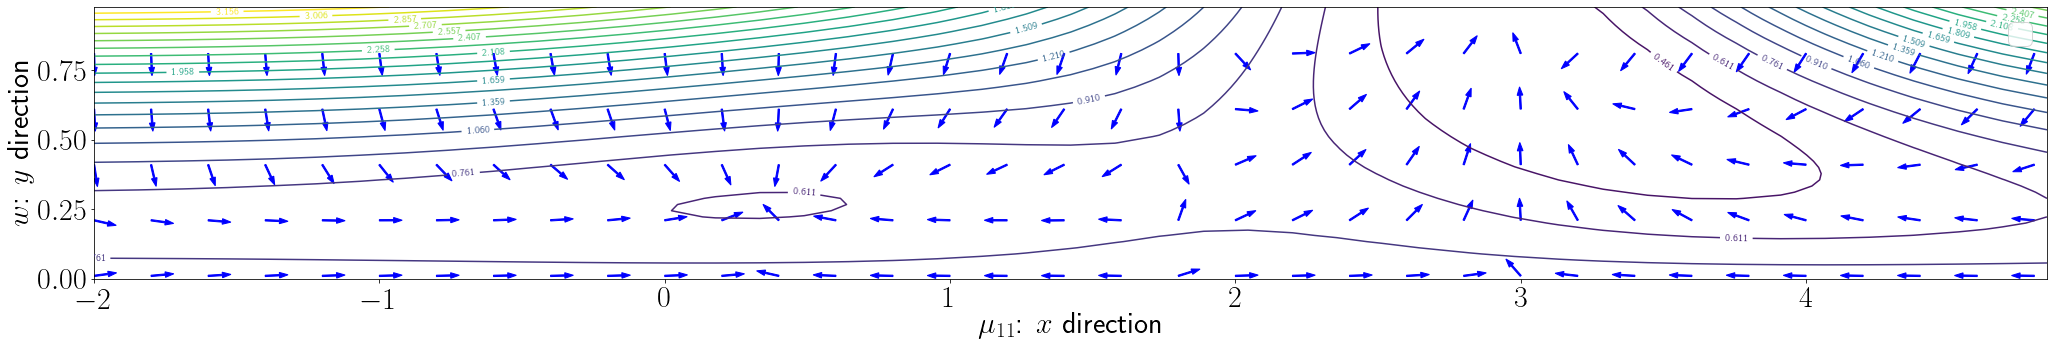

In [6]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/l2wmu11-f2d51d5-2-N85-S15-C22.eps"
Gradient.VF_l2wmu11(X, np.array([2.5, 1.5]), 2, ytruth, savpath=sav, xrange=[-2, 5]);

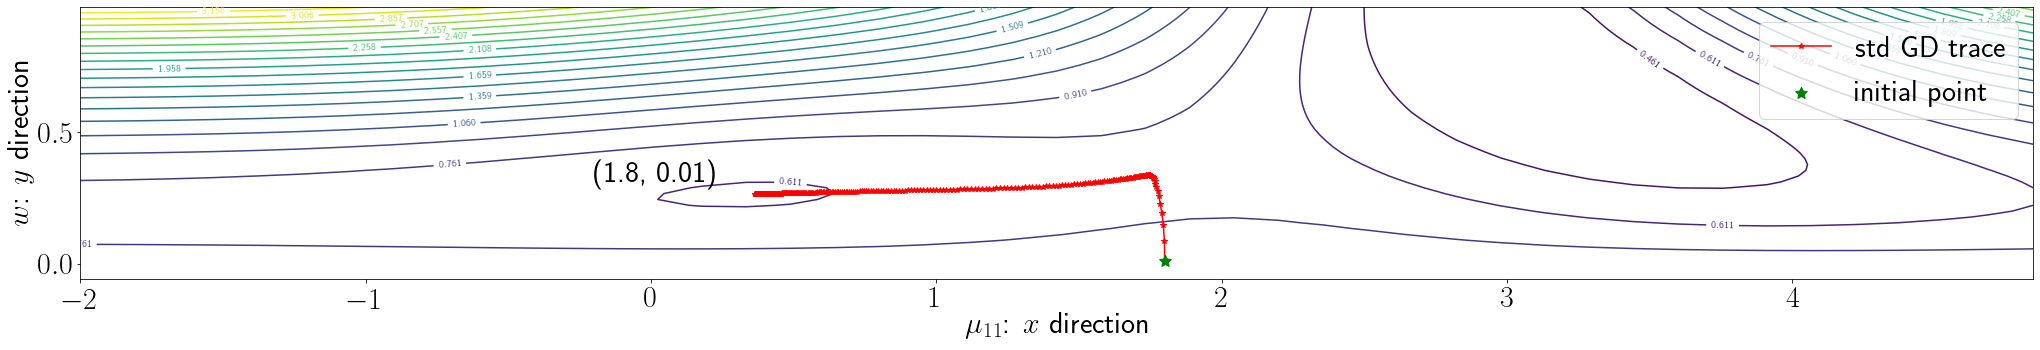

In [4]:
##do std GD experiment
std_trace = Gradient.stdGD_wmu11(X, np.array([2.5, 1.5]), 2, ytruth, np.array([1.8, 0.01]), 
                    .1, 300, xrange=[-2, 5]);

/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:823: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


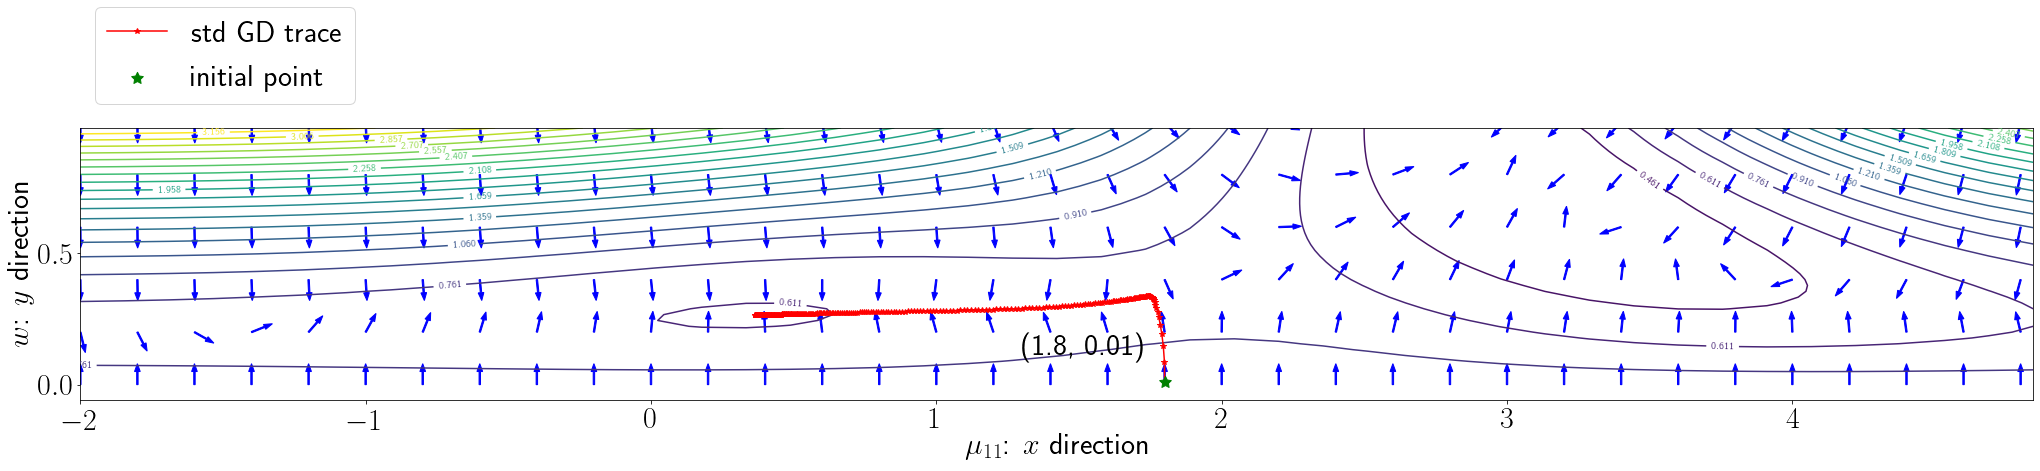

In [5]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/GDtest/stdwmu11-f2d51d5-2-N85-S15-C22-i1d80d01-lrd1-300.eps"
Gradient.VF_stdwmu11(X, np.array([2.5, 1.5]), 2, ytruth, std_trace,
                     savpath=sav, xrange=[-2, 5]);

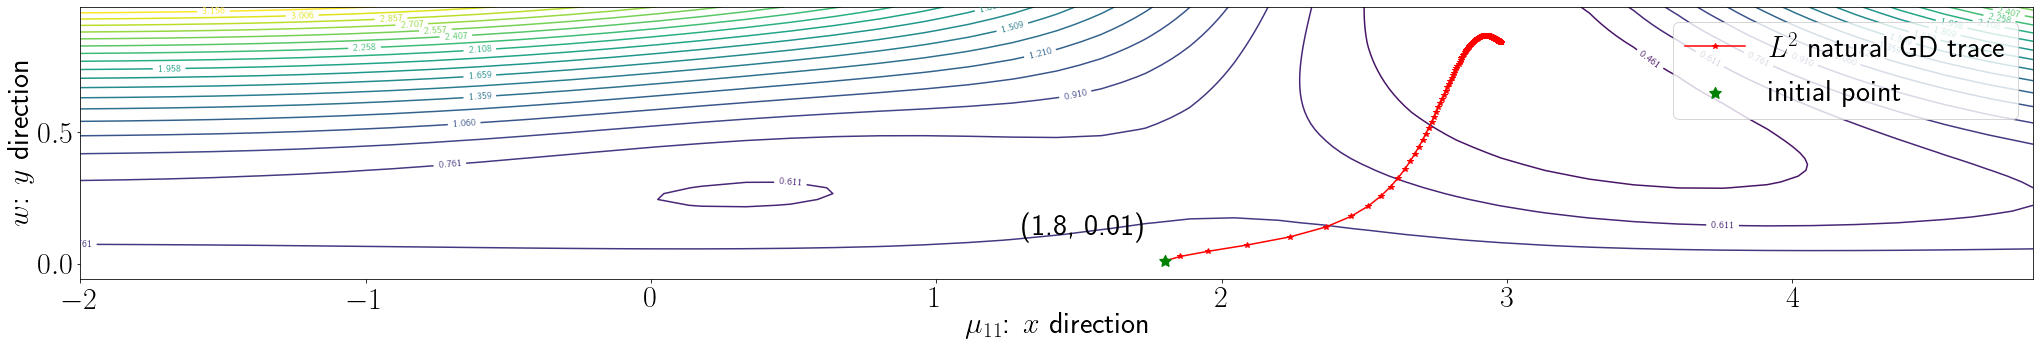

In [6]:
##L2 natural GD experiment
l2_trace = Gradient.l2GD_wmu11(X, np.array([2.5, 1.5]), 2, ytruth, np.array([1.8, 0.01]), 
                    .05, 500, xrange=[-2, 5]);

/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:862: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


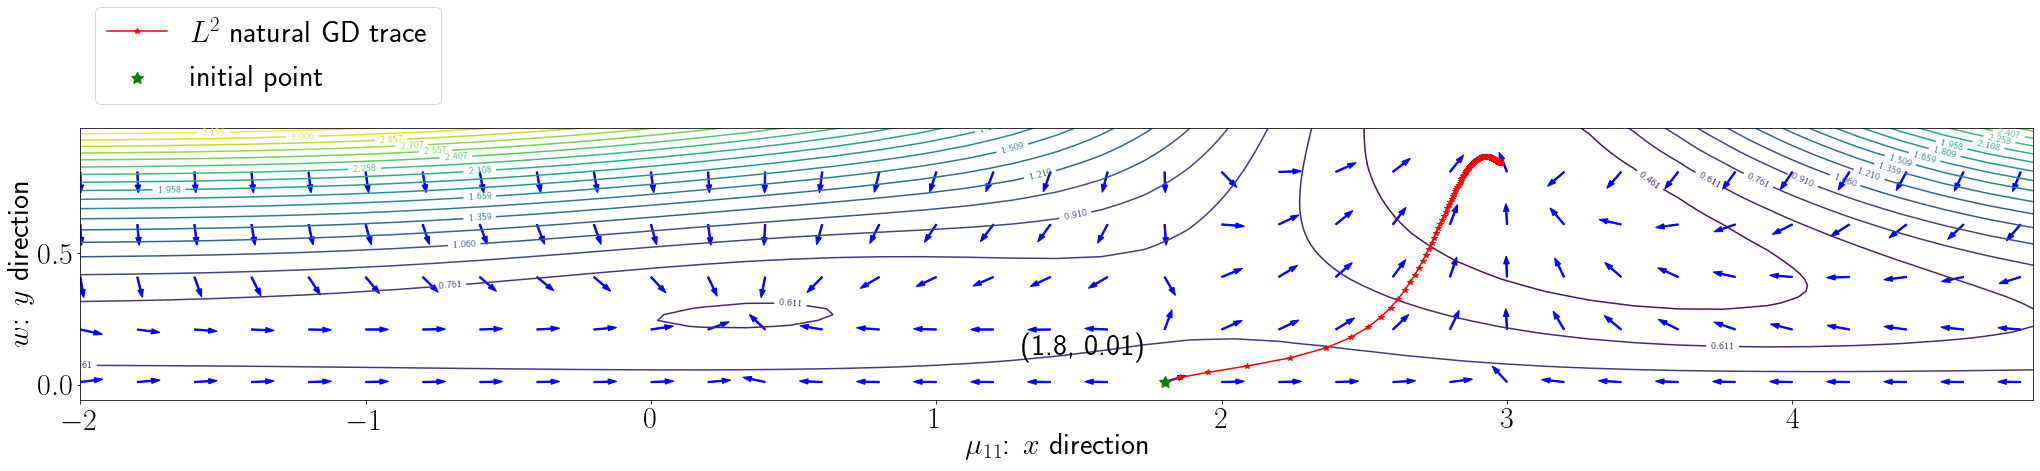

In [7]:
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/GDtest/l2wmu11-f2d51d5-2-N85-S15-C22-i1d80d01-lrd05-500.eps"
Gradient.VF_l2wmu11(X, np.array([2.5, 1.5]), 2, ytruth, l2_trace,
                    savpath=sav, xrange=[-2, 5]);

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Each step takes: 37.80466328859329


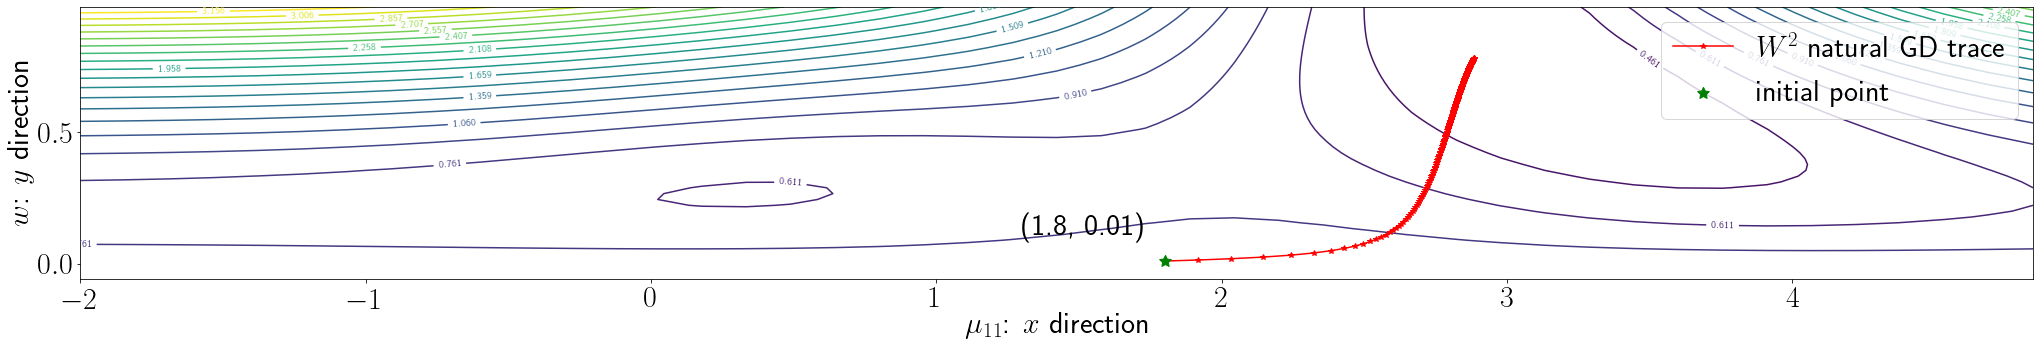

In [6]:
##W2 natural GD experiment
s = time.time();
iteration = 200;
figsav = "/Users/leiwanzhou/Desktop/vectorfields/set3/w2wmu11-f2d51d5-2-N85-S15-C22-i1d80d01-lrd1-200.eps"
tracesav = "/Users/leiwanzhou/Desktop/vectorfields/set3/trace/w2wmu11-f2d51d5-2-N85-S15-C22-i1d80d01-lrd1-200.csv"
w2_trace = Gradient.w2GD_wmu11(X, A, N, np.array([2.5, 1.5]), 2, ytruth, np.array([1.8, 0.01]), 
                    .1, iteration, savpath=figsav, tracepath=tracesav, xrange=[-2, 5]);
e = time.time();
print("Each step takes: {}".format((e-s)/iteration));

/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:953: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


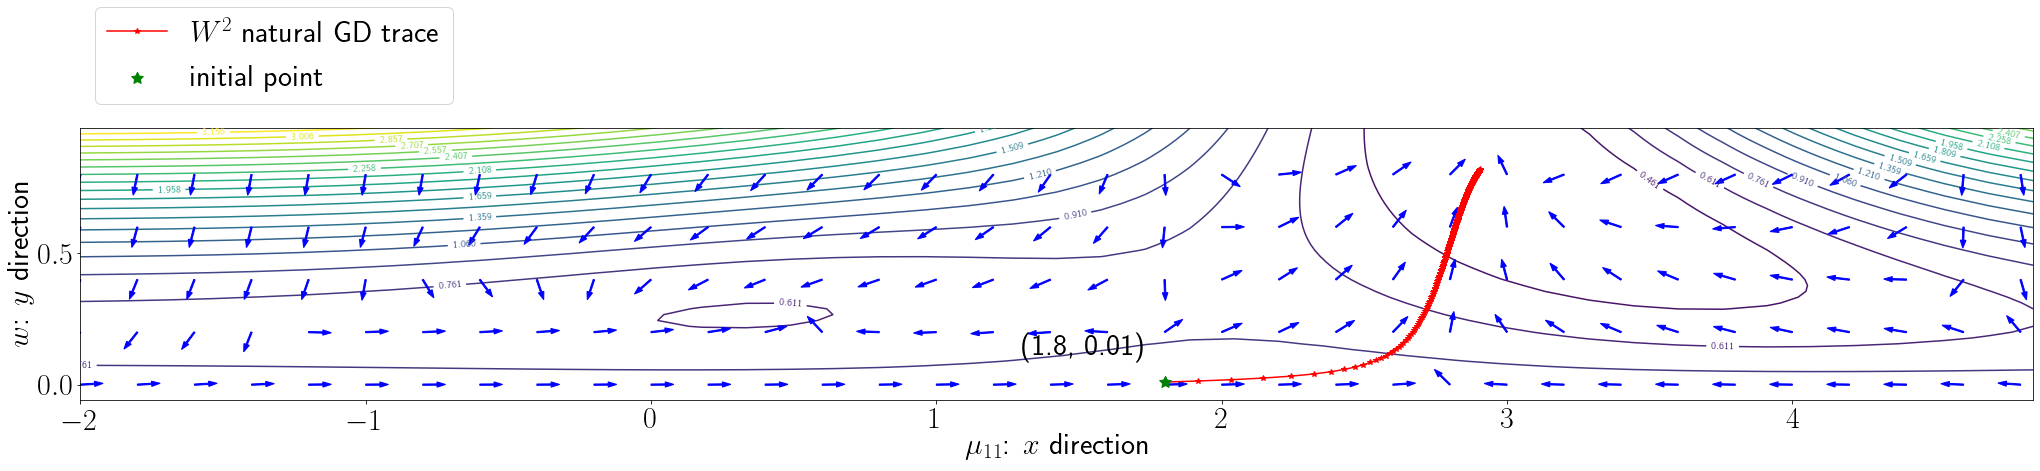

In [4]:
##read the vector field from the csv file
vfp= "/Users/leiwanzhou/Desktop/vectorfields/set3/w2VFlog/w2wmu11-f2d51d5-2-N85-S15-C22.csv"
vf_w2 = np.genfromtxt(vfp);
##this is the path to the trace file
tp = "/Users/leiwanzhou/Desktop/vectorfields/set3/trace/w2wmu11-f2d51d5-2-N85-S15-C22-i1d80d01-lrd1-250.csv"
##read from the trace file
trace_w2 = np.genfromtxt(tp);
##eps save path
sav = "/Users/leiwanzhou/Desktop/vectorfields/set3/w2wmu11-f2d51d5-2-N85-S15-C22-i1d80d05-lrd1-250.eps"
Gradient.plot_w2VF_wmu11(X, np.array([2.5, 1.5]), 2, ytruth, vf_w2, trace = trace_w2, savpath=sav,
                        xrange=[-2, 5]);


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


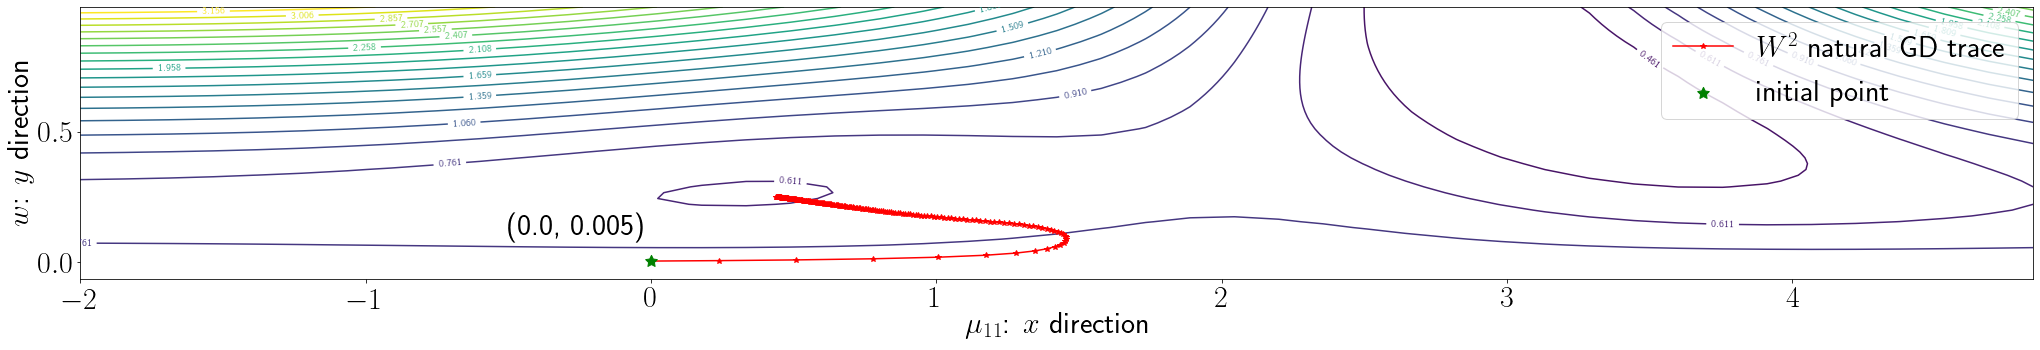

In [5]:
##another W2 natural GD experiment
iteration = 200;
figsav = "/Users/leiwanzhou/Desktop/vectorfields/set3/w2wmu11-f2d51d5-2-N85-S15-C22-i00d005-lrd5-200.eps"
tracesav = "/Users/leiwanzhou/Desktop/vectorfields/set3/trace/w2wmu11-f2d51d5-2-N85-S15-C22-i00d005-lrd5-200.csv"
w2_trace = Gradient.w2GD_wmu11(X, A, N, np.array([2.5, 1.5]), 2, ytruth, np.array([0, 0.005]), 
                    .5, iteration, savpath=figsav, tracepath=tracesav, xrange=[-2, 5]);